In [67]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import sys
import numpy as np
sys.path.append('..')
from utils import utils
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


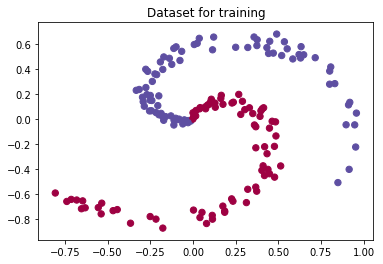

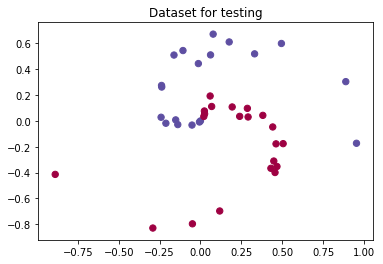

In [68]:
X_train,yhat_train,X_test,yhat_test = utils.create_simple_dataset()



In [76]:
LR  = SGDClassifier(loss='log',eta0=0.5,learning_rate='constant',max_iter=10000,penalty='none')
binclf = LR.fit(X_train.T,yhat_train[0])
predicted = binclf.predict(X_test.T)
print (np.mean(predicted == yhat_test[0]))

0.675


In [62]:
class NeuralNet(nn.Module):
    """A Neural Network with a hidden layer"""
    def __init__(self, input_size,hidden_size,output_size):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        output = self.layer1(x)
        output = self.tanh(output)
        output = self.layer2(output)
        output = self.sigmoid(output)
        return output

In [63]:
input_size = 2
hidden_size = 5
output_size = 1
num_epochs = 1000

learning_rate = 0.05

model = NeuralNet(input_size,hidden_size, output_size)

lossFunction = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [64]:

X_train_var = Variable(torch.from_numpy(X_train.T).float(), requires_grad=False)
yhat_train_var = Variable(torch.from_numpy(yhat_train.T).float(),requires_grad=False)
X_test_var = Variable(torch.from_numpy(X_test.T).float(), requires_grad=False)
yhat_test_var = Variable(torch.from_numpy(yhat_test.T).float(),requires_grad=False)
for epoch in range(num_epochs):
    out = model(X_train_var)
    loss = lossFunction(out,yhat_train_var)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch%100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}' .format(epoch, num_epochs, loss.data[0]))


Epoch [0/1000], Loss: 0.7217
Epoch [100/1000], Loss: 0.0814
Epoch [200/1000], Loss: 0.0389
Epoch [300/1000], Loss: 0.0270
Epoch [400/1000], Loss: 0.0195
Epoch [500/1000], Loss: 0.0140
Epoch [600/1000], Loss: 0.0106
Epoch [700/1000], Loss: 0.0084
Epoch [800/1000], Loss: 0.0068
Epoch [900/1000], Loss: 0.0056


In [65]:
pred = model(X_test_var)
predicted = np.round(pred.data.numpy()).T
accuracy = np.mean(predicted == yhat_test)
accuracy

0.95